In [1]:
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from umap import UMAP

%matplotlib inline

In [2]:
def read_data(filename: str, delimeter=';'):
    with open(filename, mode="r", newline='') as f:
        features = list()
        targets = list()
        for row in f:
            line = list()
            for s in row.split(delimeter):
                s = s.strip()
                if s:
                    line.append(s)
            features.append(list(map(float ,line[1:-1])))
            targets.append(int(line[-1]))
    return features, targets

In [3]:
def plot_embeddings(embedded_tsne, embedded_umap, targets, names):
    labels = list(range(np.max(targets)+1))
    palette = np.array(sns.color_palette(n_colors=len(labels)))

    patchs = []
    for i, color in enumerate(palette):
        patchs.append(mpatches.Patch(color=color, label=names[i-1]))


    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(embedded_tsne[:,0], embedded_tsne[:,1], c=palette[targets])
    plt.legend(handles=patchs, loc='upper right')
    plt.title("Embedded with t-SNE")

    plt.subplot(2, 1, 2)
    plt.scatter(embedded_umap[:,0], embedded_umap[:,1], c=palette[targets])
    plt.legend(handles=patchs, loc='upper right')
    plt.title("Embedded with UMAP")

    plt.show()

In [4]:
features, targets = read_data('glass.data', delimeter=',')
np.array(features)

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [5]:
names = ('building_windows_float_processed',
          'building_windows_non_float_processed',
          'vehicle_windows_float_processed',
          'vehicle_windows_non_float_processed',
          'containers',
          'tableware',
          'headlamps')

In [6]:
embedded_tsne = TSNE().fit_transform(np.array(features))

C:\Users\metar\Documents\GitHub\ISIT_M1\PR_3-4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\metar\Documents\GitHub\ISIT_M1\PR_3-4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:
embedded_umap = UMAP().fit_transform(features)

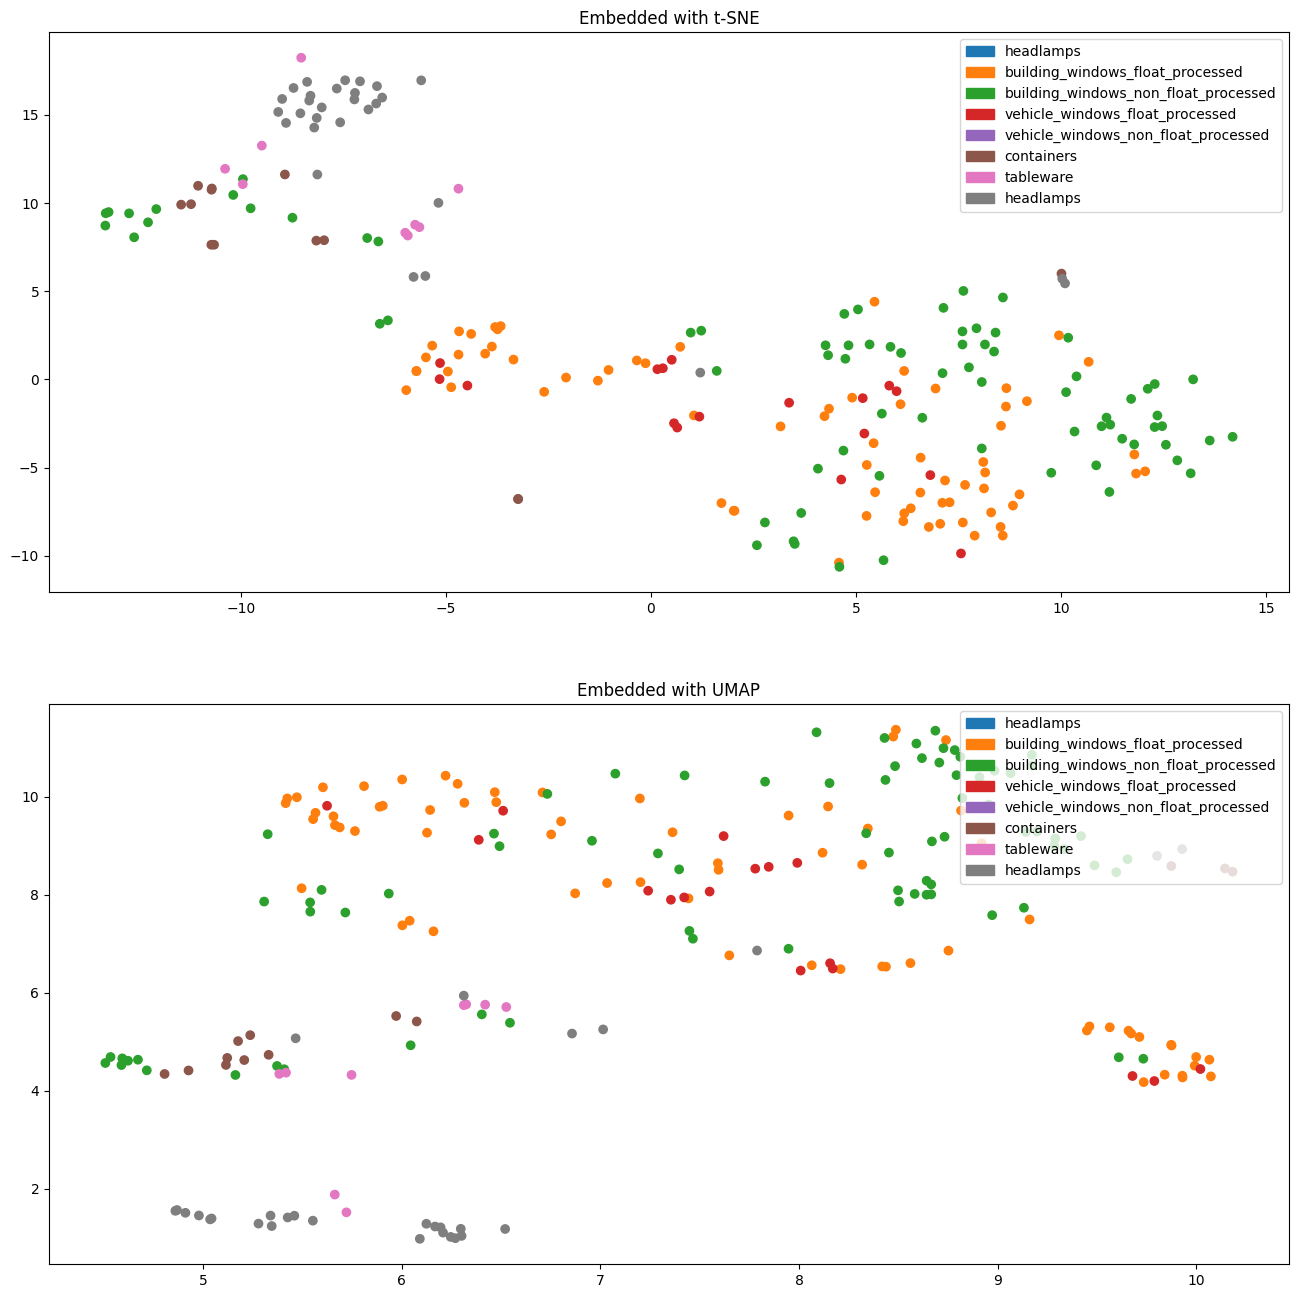

In [8]:
plot_embeddings(embedded_tsne, embedded_umap, targets, names)

In [9]:
min_max_scaled_tsne = TSNE().fit_transform(MinMaxScaler().fit_transform(features))
min_max_scaled_umap = UMAP().fit_transform(MinMaxScaler().fit_transform(features))

C:\Users\metar\Documents\GitHub\ISIT_M1\PR_3-4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\metar\Documents\GitHub\ISIT_M1\PR_3-4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


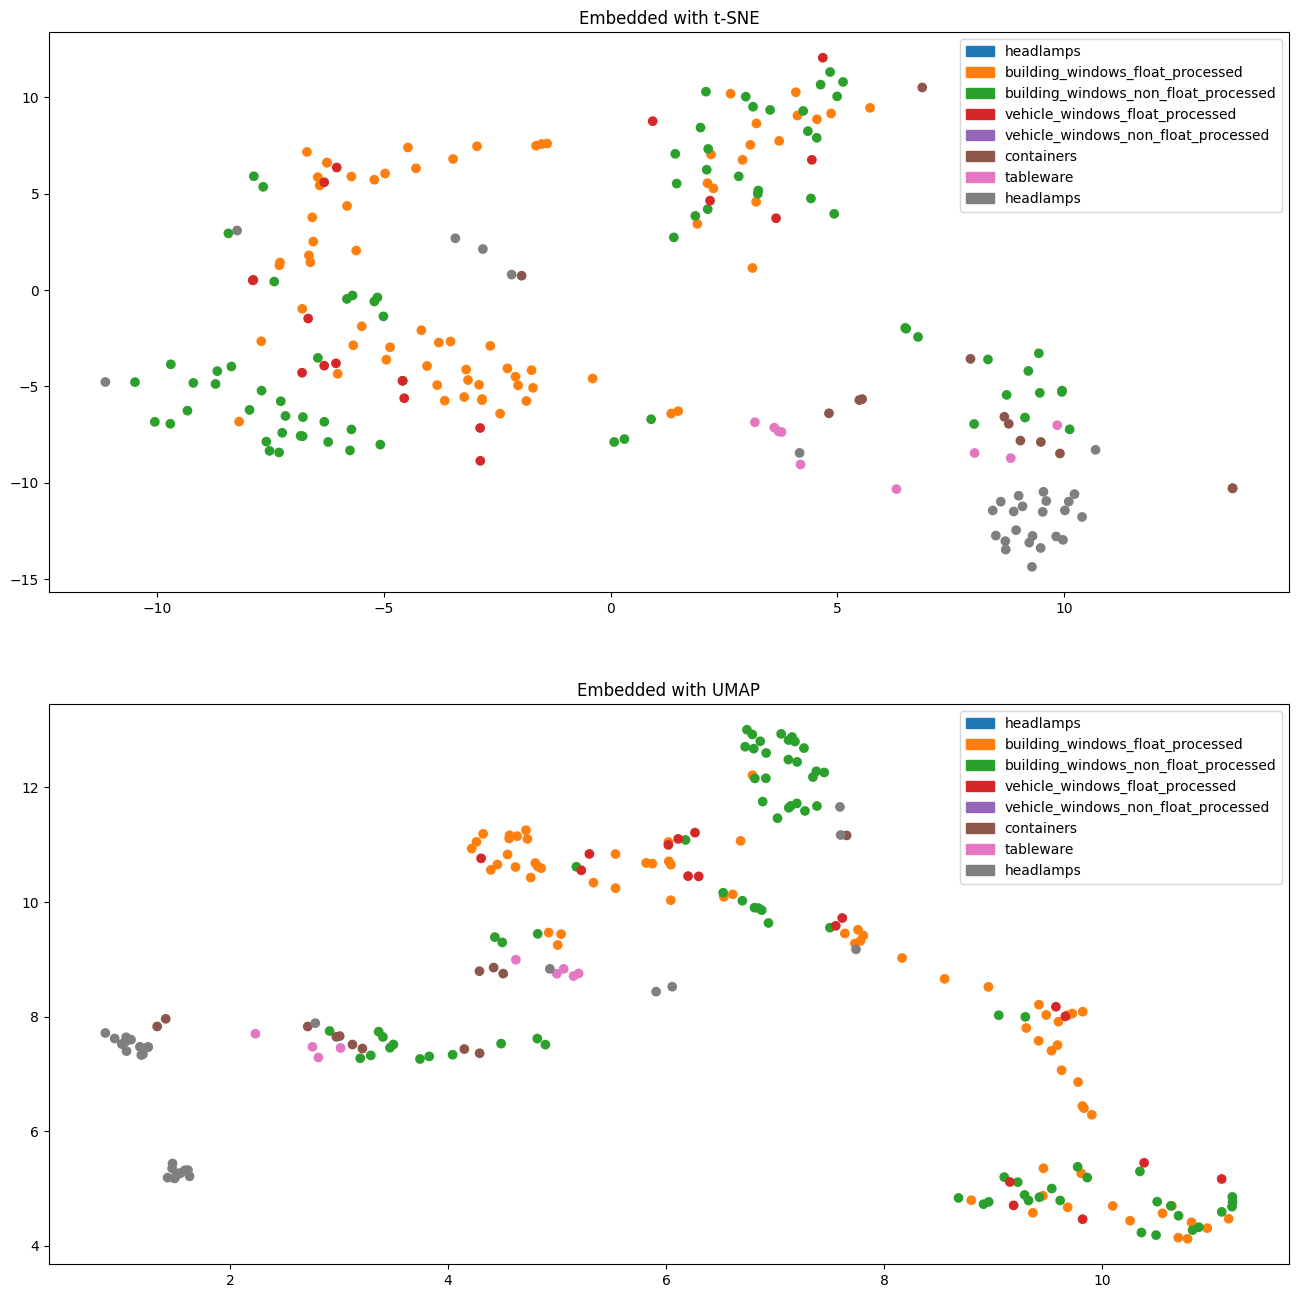

In [10]:
plot_embeddings(min_max_scaled_tsne, min_max_scaled_umap, targets, names)

C:\Users\metar\Documents\GitHub\ISIT_M1\PR_3-4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\metar\Documents\GitHub\ISIT_M1\PR_3-4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


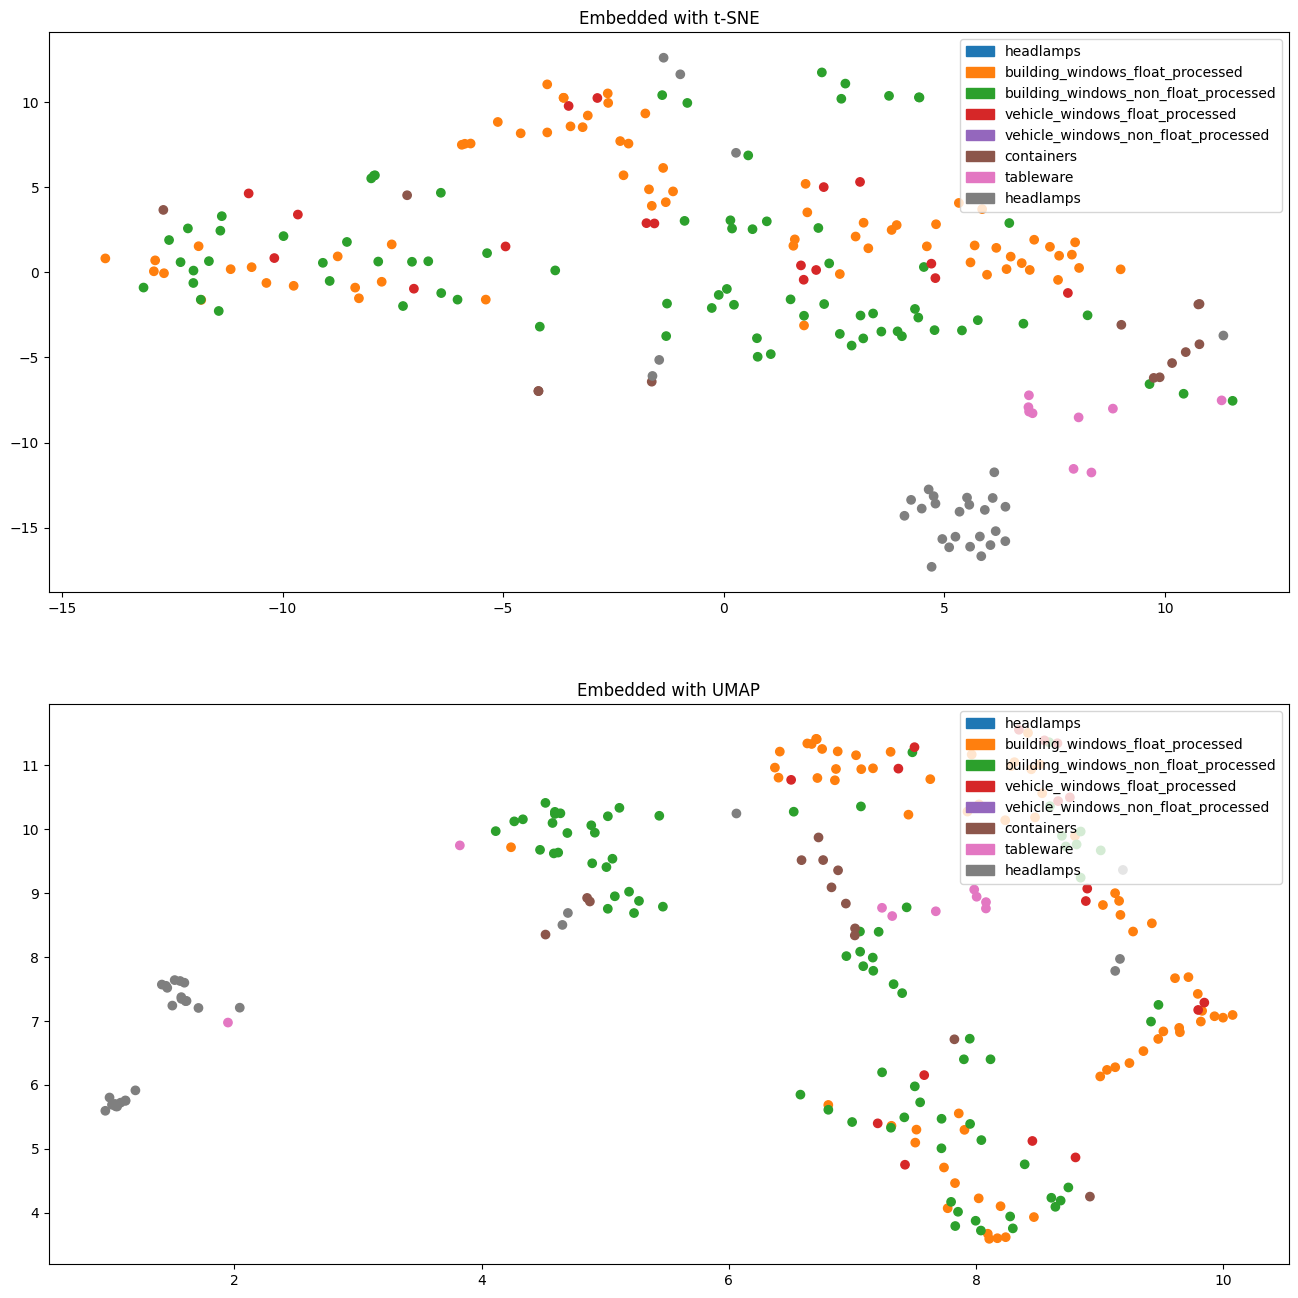

In [11]:
standard_scaled_tsne = TSNE().fit_transform(StandardScaler().fit_transform(features))
standard_scaled_umap = UMAP().fit_transform(StandardScaler().fit_transform(features))
plot_embeddings(standard_scaled_tsne, standard_scaled_umap, targets, names)

C:\Users\metar\Documents\GitHub\ISIT_M1\PR_3-4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\metar\Documents\GitHub\ISIT_M1\PR_3-4\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


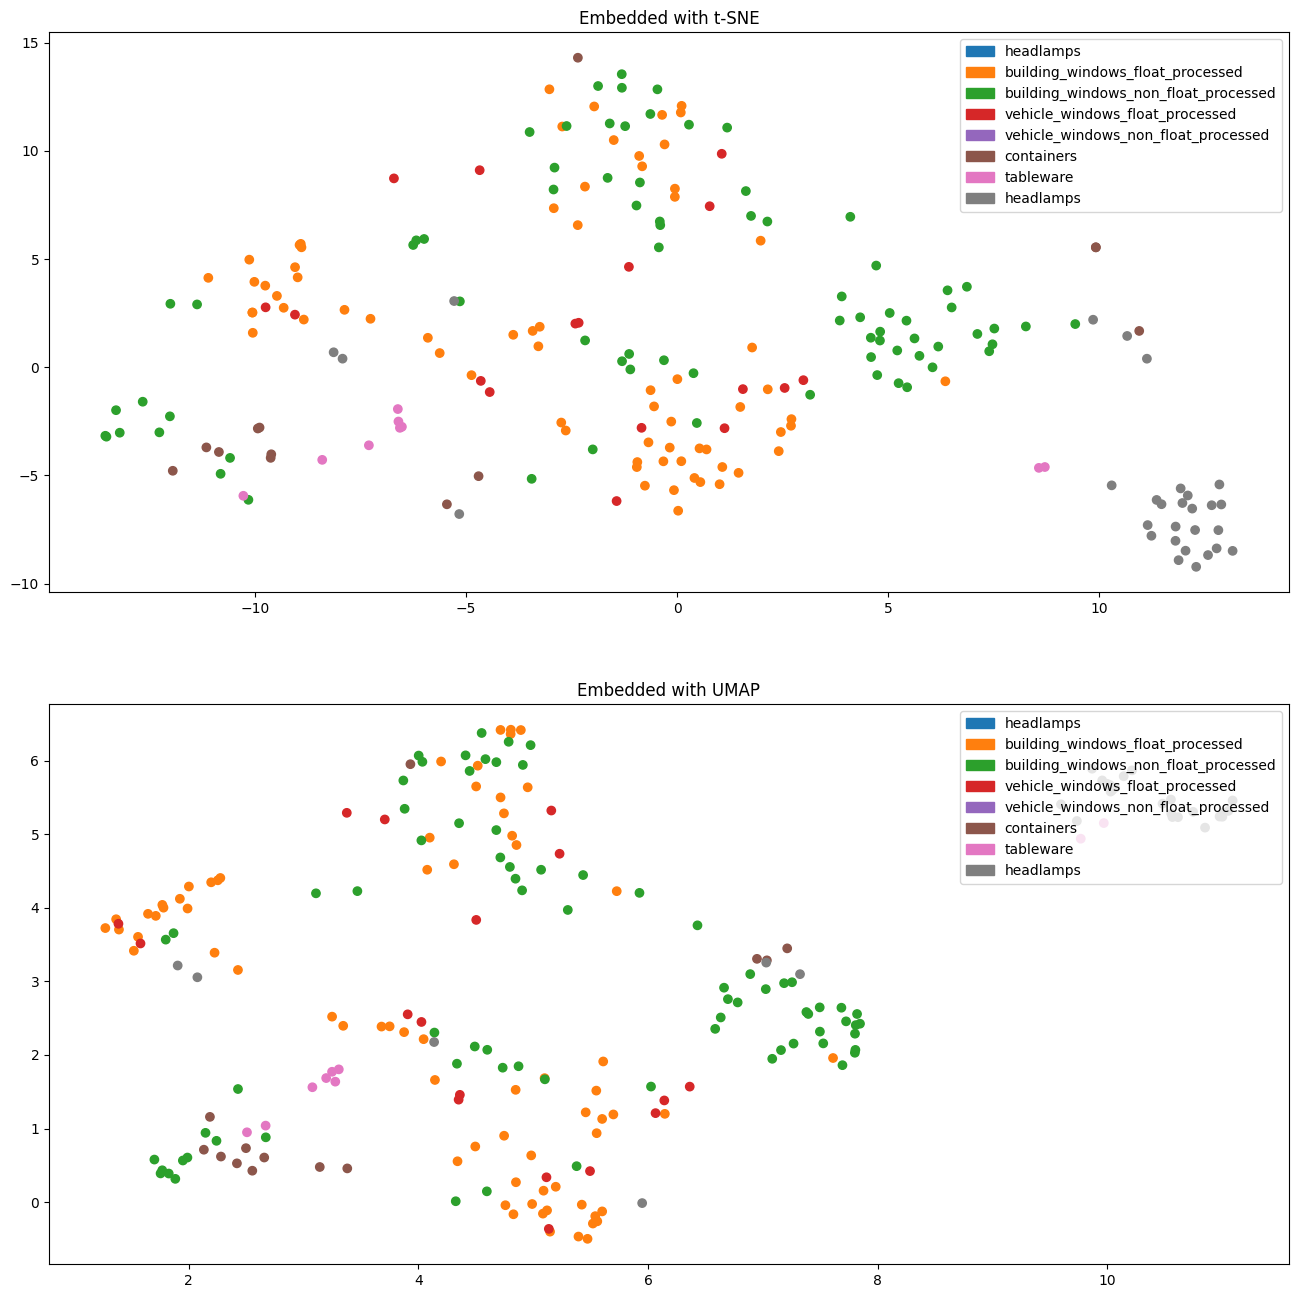

In [12]:
robust_scaled_tsne = TSNE().fit_transform(RobustScaler().fit_transform(features))
robust_scaled_umap = UMAP().fit_transform(RobustScaler().fit_transform(features))
plot_embeddings(robust_scaled_tsne, robust_scaled_umap, targets, names)